In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D


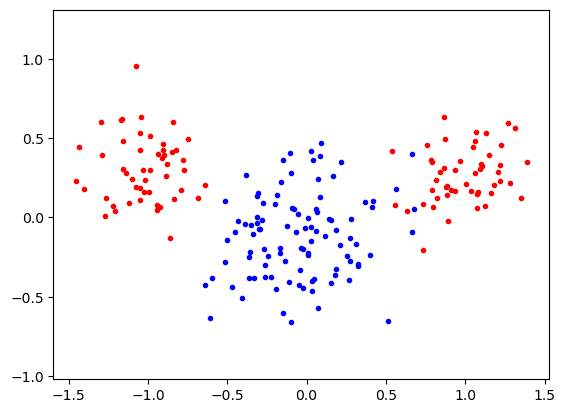

In [3]:


#part 1
#classification of a new point none linearly separable
n_2=100
mA_2 = np.array([1,0.3])
sigmaA_2 = 0.2
mB_2 = np.array([0,-0.1])
sigmaB_2 = 0.3
classA2 = np.zeros((n_2//2,2))
classA_bis = np.zeros((n_2//2,2))
classB2 = np.zeros((n_2,2))
classA2[:,0] = np.random.normal(mA_2[0],sigmaA_2,n_2//2)
classA2[:,1] = np.random.normal(mA_2[1],sigmaA_2,n_2//2)
classA_bis[:,0] = np.random.normal(-mA_2[0],sigmaA_2,n_2//2)
classA_bis[:,1] = np.random.normal(mA_2[1],sigmaA_2,n_2//2)
classB2[:,0] = np.random.normal(mB_2[0],sigmaB_2,n_2)
classB2[:,1] = np.random.normal(mB_2[1],sigmaB_2,n_2)
classA2 = np.concatenate((classA2,classA_bis),axis=0)
#suffle the data
np.random.shuffle(classA2)

input = np.concatenate((classA2,classB2))

target = [1]*int(n_2) + [-1]*int(n_2)
order = list(range(2*n_2))
random.shuffle(order)
input = [input[i] for i in order]
target = [[target[i]] for i in order]

input = np.array(input)
target = np.array(target)
target = target.T
input = input.T


#plotting the data
plt.plot([p[0] for p in classA2],[p[1] for p in classA2],'r.')
plt.plot([p[0] for p in classB2],[p[1] for p in classB2],'b.')
plt.axis('equal')
plt.show()


In [4]:
#implementing a two layer perceptron trained with backpropagation
print(input.shape)

#activation function
def phi(x,deriv=False):
    phi = 2/(1+np.exp(-x))-1
    if deriv:
        return (1+phi)*(1-phi)*0.5
    return phi

#forwards propagation
def forward(x,w,v):
    one = np.ones((1,x.shape[1]))
    x = np.concatenate((x,one),axis=0)
    z1 = np.dot(w,x)
    a1 = phi(z1)
    a1 = np.concatenate((a1,one),axis=0)
    z2 = np.dot(v,a1)
    a2 = phi(z2)
    return a2



#backwards propagation
def backward(x,targets,eta, w ,v):
    one = np.ones((1,x.shape[1]))
    x = np.concatenate((x,one),axis=0)
    hin = np.dot(w,x)
    hout = np.concatenate((phi(hin),one),axis=0)
    oin = np.dot(v,hout)
    out= phi(oin)
    delta_o = np.multiply((out-targets),(1+out)*(1-out)/2)
    delta_h = np.multiply(np.dot(v.T,delta_o),(1+hout)*(1-hout)/2)

    #removing the bias
    delta_h = delta_h[:-1,:]

    v -= eta*np.dot(delta_o,hout.T)
    w -= eta*np.dot(delta_h,x.T)
    return w,v
    
#loss function
def loss(x,targets,w,v):
    out = forward(x,w,v)
    return np.sum((out-targets)**2)/x.shape[1]

#initializing the weights and epochs
input_size = 2
node_layer1 = 10
output_layer = 1

#adding bias to the input
input_size += 1

w = np.random.randn(node_layer1,input_size)
v = np.random.randn(output_layer,node_layer1+1)

try:
    forward(input,w,v)
    print("forward pass successful")
except:
    print("forward pass failed")

try:
    backward(input,target,0.1,w,v)
    print("backward pass successful")
except:
    print("backward pass failed")



(2, 200)
forward pass successful
backward pass successful


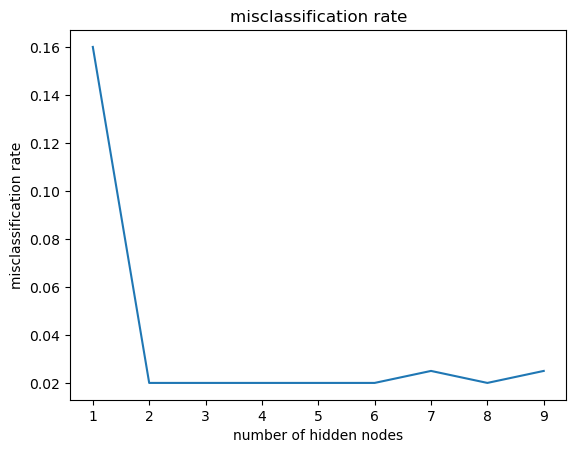

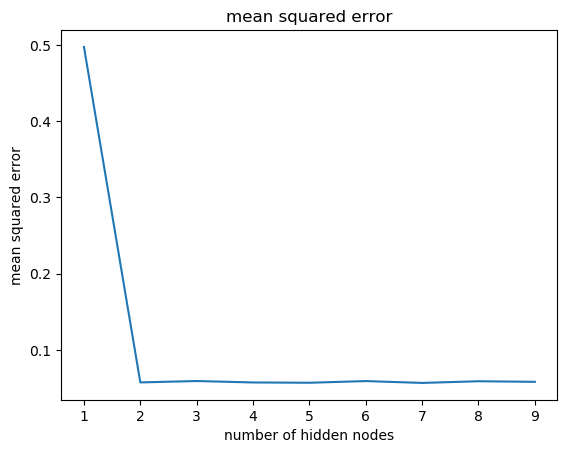

In [5]:
#initializing the weights and epochs
input_size = 2

output_layer = 1

#adding bias to the input
input_size += 1
epochs = 1000
eta = 0.01
mis_classification = []
mse = []
#modify the number of hidden nodes and demonstrate the effect the size of the hidden layer has on the performance (both the mean squared error and the number/ratio of misclassifications)
for i in range(9):
    node_layer1 = i+1
    w = np.random.randn(node_layer1,input_size)
    v = np.random.randn(output_layer,node_layer1+1)
    #training the network
    for i in range(epochs):
        #accuracy
        w, v = backward(input,target,eta,w,v)
    #rate of misclassification
    out = forward(input,w,v)
    out = np.sign(out)
    mis_classification.append(1-np.sum(out==target)/(2*n_2))
    #mean squared error
    mse.append(loss(input,target,w,v))


plt.plot([i for i in range(1,10)],mis_classification)
plt.title("misclassification rate")
plt.xlabel("number of hidden nodes")
plt.ylabel("misclassification rate")
plt.savefig("misclassification_rate.png")
plt.show()
plt.plot([i for i in range(1,10)],mse)
plt.title("mean squared error")
plt.xlabel("number of hidden nodes")
plt.ylabel("mean squared error")
plt.savefig("mean_squared_error.png")
plt.show()        


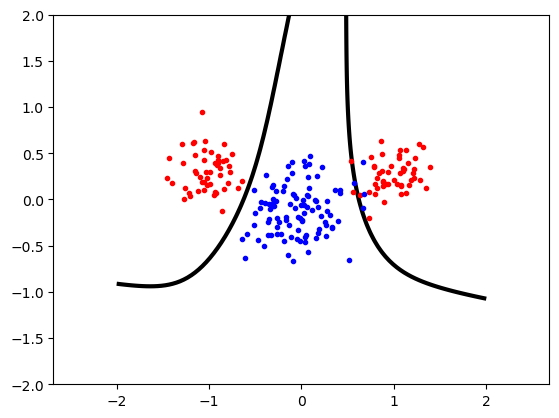

In [6]:
#plotting the decision boundary with two colors
xgrid = np.linspace(-2,2,100)
ygrid = np.linspace(-2,2,100)
grid = np.array([[forward(np.array([[x],[y]]),w,v) for x in xgrid] for y in ygrid])
grid = grid.reshape(100,100)

plt.contour(xgrid,ygrid,grid,(-1,0,1),colors=('red','black','blue'),linewidths=(1,3,1))
plt.plot([p[0] for p in classA2],[p[1] for p in classA2],'r.')
plt.plot([p[0] for p in classB2],[p[1] for p in classB2],'b.')
plt.axis('equal')

plt.show()


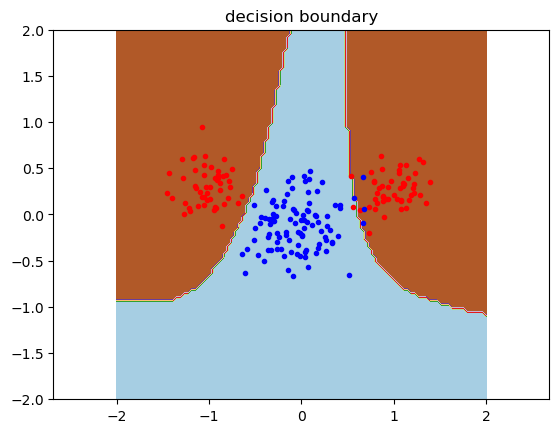

In [7]:
# create all of the lines and rows of the grid

xx, yy = np.meshgrid(xgrid, ygrid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))


# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))
grid = grid.T

# make predictions for the grid
yhat = forward(grid,w,v)

#decision according to the prediction
yhat = np.where(yhat>0,1,-1)

zz = yhat.reshape(xx.shape)

plt.contourf(xx, yy, zz, cmap='Paired')
plt.plot([p[0] for p in classA2],[p[1] for p in classA2],'r.')
plt.plot([p[0] for p in classB2],[p[1] for p in classB2],'b.')
plt.axis('equal')
plt.title("decision boundary")
plt.savefig("decision_boundary.png")
plt.show()




In [8]:
#remove random 25% from each class
classA_1_train = classA2[:75,:]
classB_1_train = classB2[:75,:]
classA_1_val = classA2[75:,:]
classB_1_val = classB2[75:,:]


#remove random 50% from class A
classA_2_train = classA2[:50,:]
classA_2_val = classA2[50:,:]
classB_2_train = classB2


# 20% of 50 samples (10 samples) from a subset of classA for which classA(1,:)<0 and 80%, 40 samples from a subset of classA for which classA(1,:)>0
classA_4_val = classA2[classA2[:,0]<0,:][:10,:]
classA_4_train = classA2[classA2[:,0]<0,:][10:,:]
classA_5_val = classA2[classA2[:,0]>0,:][:40,:]
classA_5_train = classA2[classA2[:,0]>0,:][40:,:]
classA_6_train = np.concatenate((classA_4_train,classA_5_train),axis=0)
classA_6_val = np.concatenate((classA_4_val,classA_5_val),axis=0)
np.random.shuffle(classA_6_val)
np.random.shuffle(classA_6_train)




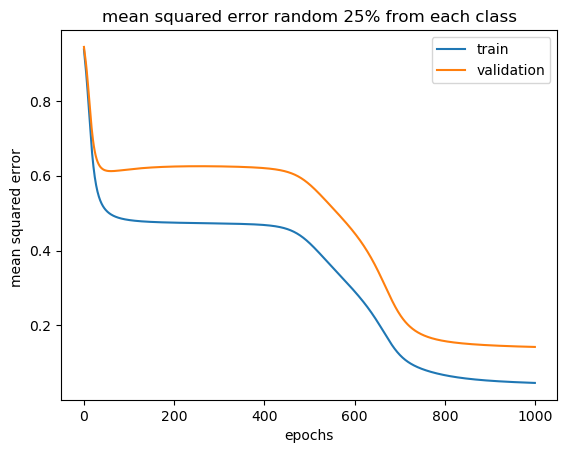

In [9]:
input = np.concatenate((classA_1_train,classB_1_train),axis=0)

target = [1]*int(75) + [-1]*int(75)
order = list(range(2*75))
random.shuffle(order)
input = [input[i] for i in order]
target = [[target[i]] for i in order]

input = np.array(input)
target = np.array(target)
target = target.T
input = input.T

validation = np.concatenate((classA_1_val,classB_1_val),axis=0)
validation_target = [1]*int(25) + [-1]*int(25)
order = list(range(2*25))
random.shuffle(order)
validation = [validation[i] for i in order]
validation_target = [[validation_target[i]] for i in order]
validation = np.array(validation).T
validation_target = np.array(validation_target).T

#initializing the weights and epochs
input_size = 2

output_layer = 1

#adding bias to the input
input_size += 1
epochs = 1000
eta = 0.01
mis_classification = []
mse_val = []
mse_train = []

node_layer1 = 2

w = np.random.randn(node_layer1,input_size)
v = np.random.randn(output_layer,node_layer1+1)
    #training the network
for i in range(epochs):
    #mean squared error
    mse_train.append(loss(input,target,w,v))
    #validation
    mse_val.append(loss(validation,validation_target,w,v))
    w, v = backward(input,target,eta,w,v)

plt.plot([i for i in range(epochs)],mse_train)
plt.plot([i for i in range(epochs)],mse_val)
plt.title("mean squared error train")
plt.xlabel("epochs")
#label y "mean squared error random 25% from each class"
plt.ylabel("mean squared error ")
plt.title("mean squared error random 25% from each class")
#legend
plt.legend(['train','validation'])
plt.savefig("mean_squared_error_random_25.png")
plt.show()



    


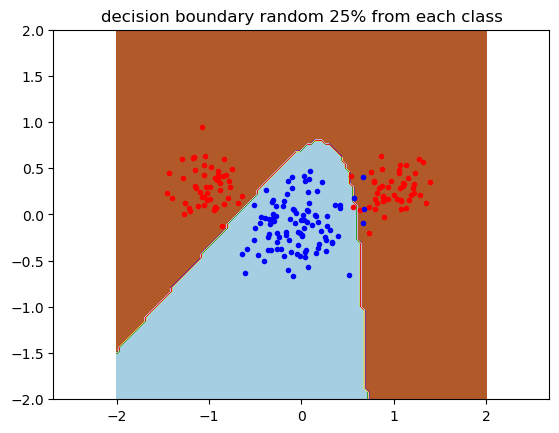

In [10]:
# create all of the lines and rows of the grid

xx, yy = np.meshgrid(xgrid, ygrid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))


# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))
grid = grid.T

# make predictions for the grid
yhat = forward(grid,w,v)

#decision according to the prediction
yhat = np.where(yhat>0,1,-1)

zz = yhat.reshape(xx.shape)

plt.contourf(xx, yy, zz, cmap='Paired')
plt.plot([p[0] for p in classA2],[p[1] for p in classA2],'r.')
plt.plot([p[0] for p in classB2],[p[1] for p in classB2],'b.')
plt.axis('equal')
plt.title("decision boundary random 25% from each class")
plt.savefig("decision_boundary_random_25.png")
plt.show()


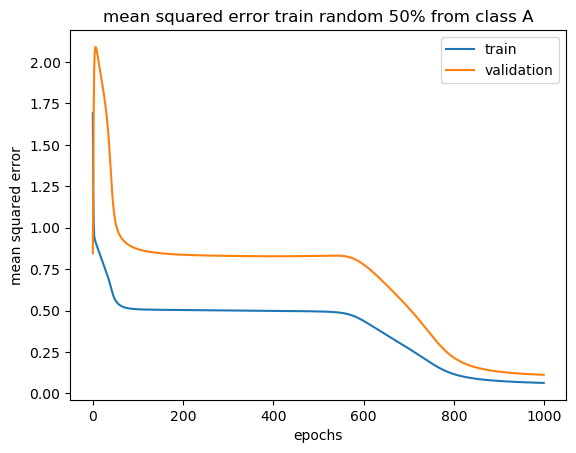

In [11]:
input = np.concatenate((classA_2_train,classB_2_train),axis=0)

target = [1]*int(50) + [-1]*int(100)
order = list(range(2*75))
random.shuffle(order)
input = [input[i] for i in order]
target = [[target[i]] for i in order]

input = np.array(input)
target = np.array(target)
target = target.T
input = input.T

validation = classA_2_val
validation_target = [1]*int(50)
order = list(range(2*25))
random.shuffle(order)
validation = [validation[i] for i in order]
validation_target = [[validation_target[i]] for i in order]
validation = np.array(validation).T
validation_target = np.array(validation_target).T

#initializing the weights and epochs
input_size = 2

output_layer = 1

#adding bias to the input
input_size += 1
epochs = 1000
eta = 0.01
mis_classification = []
mse_val = []
mse_train = []

node_layer1 = 2

w = np.random.randn(node_layer1,input_size)
v = np.random.randn(output_layer,node_layer1+1)
    #training the network
for i in range(epochs):
    #mean squared error
    mse_train.append(loss(input,target,w,v))
    #validation
    mse_val.append(loss(validation,validation_target,w,v))
    w, v = backward(input,target,eta,w,v)

plt.plot([i for i in range(epochs)],mse_train)
plt.plot([i for i in range(epochs)],mse_val)
plt.title("mean squared error train random 50% from class A")
#legend
plt.legend(['train','validation'])
plt.xlabel("epochs")
plt.ylabel("mean squared error")
plt.savefig("mean_squared_error_random_50.png")
plt.show()


    


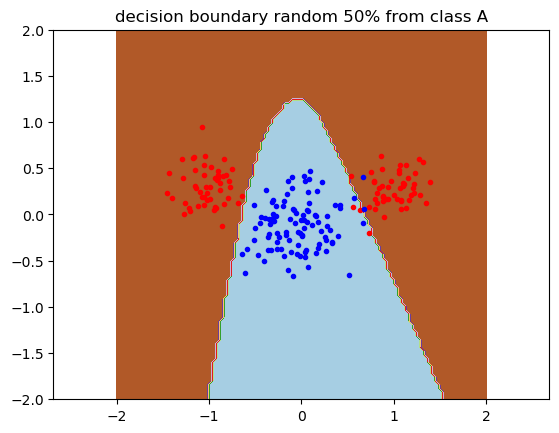

In [12]:
# create all of the lines and rows of the grid

xx, yy = np.meshgrid(xgrid, ygrid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))


# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))
grid = grid.T

# make predictions for the grid
yhat = forward(grid,w,v)

#decision according to the prediction
yhat = np.where(yhat>0,1,-1)

zz = yhat.reshape(xx.shape)

plt.contourf(xx, yy, zz, cmap='Paired')
plt.plot([p[0] for p in classA2],[p[1] for p in classA2],'r.')
plt.plot([p[0] for p in classB2],[p[1] for p in classB2],'b.')
plt.axis('equal')
plt.title("decision boundary random 50% from class A")
plt.show()



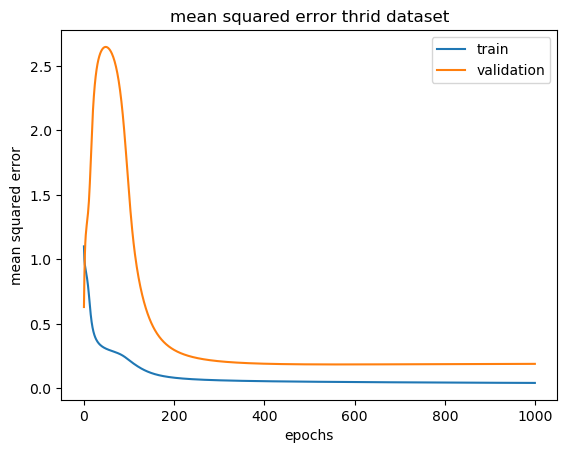

In [13]:
input = np.concatenate((classA_6_train,classB_2_train),axis=0)

target = [1]*int(50) + [-1]*int(100)
order = list(range(2*75))
random.shuffle(order)
input = [input[i] for i in order]
target = [[target[i]] for i in order]

input = np.array(input)
target = np.array(target)
target = target.T
input = input.T

validation = classA_6_val
validation_target = [1]*int(50)
order = list(range(2*25))
random.shuffle(order)
validation = [validation[i] for i in order]
validation_target = [[validation_target[i]] for i in order]
validation = np.array(validation).T
validation_target = np.array(validation_target).T

#initializing the weights and epochs
input_size = 2

output_layer = 1

#adding bias to the input
input_size += 1
epochs = 1000
eta = 0.01
mis_classification = []
mse_val = []
mse_train = []

node_layer1 = 2

w = np.random.randn(node_layer1,input_size)
v = np.random.randn(output_layer,node_layer1+1)
    #training the network
for i in range(epochs):
    #mean squared error
    mse_train.append(loss(input,target,w,v))
    #validation
    mse_val.append(loss(validation,validation_target,w,v))
    w, v = backward(input,target,eta,w,v)

plt.plot([i for i in range(epochs)],mse_train)
plt.plot([i for i in range(epochs)],mse_val)
plt.title("mean squared error train")
plt.xlabel("epochs")
plt.ylabel("mean squared error")
plt.title("mean squared error thrid dataset")
#legend
plt.legend(['train','validation'])
plt.savefig("mean_squared_error_third.png")
plt.show()


    


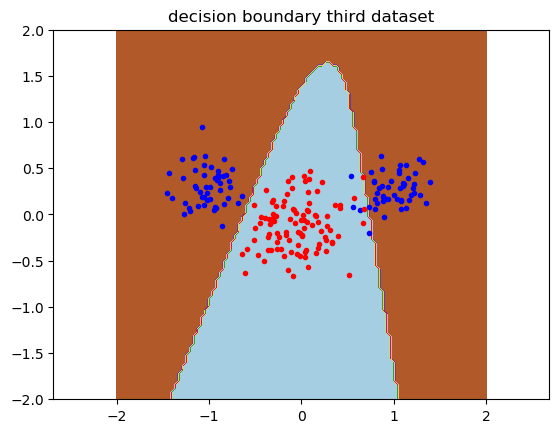

In [14]:
# create all of the lines and rows of the grid

xx, yy = np.meshgrid(xgrid, ygrid)

# flatten each grid to a vector
r1, r2 = xx.flatten(), yy.flatten()
r1, r2 = r1.reshape((len(r1), 1)), r2.reshape((len(r2), 1))


# horizontal stack vectors to create x1,x2 input for the model
grid = np.hstack((r1,r2))
grid = grid.T

# make predictions for the grid
yhat = forward(grid,w,v)

#decision according to the prediction
yhat = np.where(yhat>0,1,-1)

zz = yhat.reshape(xx.shape)

plt.contourf(xx, yy, zz, cmap='Paired')
plt.plot([p[0] for p in classA2],[p[1] for p in classA2],'b.')
plt.plot([p[0] for p in classB2],[p[1] for p in classB2],'r.')
plt.axis('equal')
plt.title("decision boundary third dataset")
plt.show()





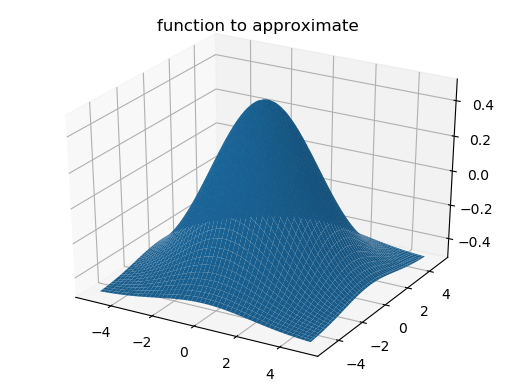

In [15]:
def function(x,y):
    return np.exp(-(x**2+y**2)/10)-0.5

x = np.linspace(-5,5,100)
y = np.linspace(-5,5,100)

#visualize the function
X,Y = np.meshgrid(x,y)
Z = function(X,Y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,Z)
plt.title("function to approximate")
plt.savefig("function_to_approximate.png")
plt.show()


In [16]:

#X,Y trasform for training
X = X.flatten()
Y = Y.flatten()
Z = Z.flatten()
input = np.array([X,Y])
target = np.array([Z])


#shuffle the data
order = list(range(10000))
random.shuffle(order)
input = [input[:,i] for i in order]
target = [target[:,i] for i in order]
input = np.array(input).T
target = np.array(target).T

#initializing the weights and epochs
input_size = 2

output_layer = 1

#adding bias to the input
input_size += 1
epochs = 200
eta = 0.0001
node_layer1 = 10

X = X.flatten()
Y = Y.flatten()
Z = Z.flatten()

input_graph = np.array([X,Y])
target_graph = np.array([Z])
print(input_graph.shape)
x = np.linspace(-5,5,100)
y = np.linspace(-5,5,100)
#visualize the function
X_graph,Y_graph = np.meshgrid(x,y)
#training the network

(2, 10000)


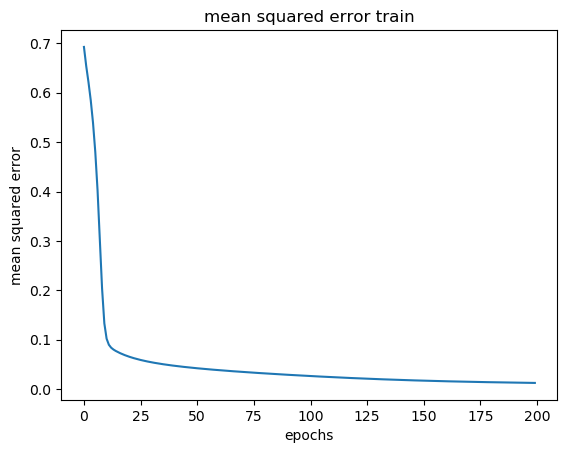

In [17]:
w = np.random.randn(node_layer1,input_size)
v = np.random.randn(output_layer,node_layer1+1)
result =[]
mse = []
for i in range(epochs):
        w, v = backward(input,target,eta,w,v)
        #mean squared error
        mse.append(loss(input,target,w,v))

        if i%50==0:
            output = forward(input_graph,w,v)
            result.append(output)
output = forward(input_graph,w,v)
result.append(output)          
plt.plot(mse)
plt.title("mean squared error train")
plt.xlabel("epochs")
plt.ylabel("mean squared error")
plt.show()



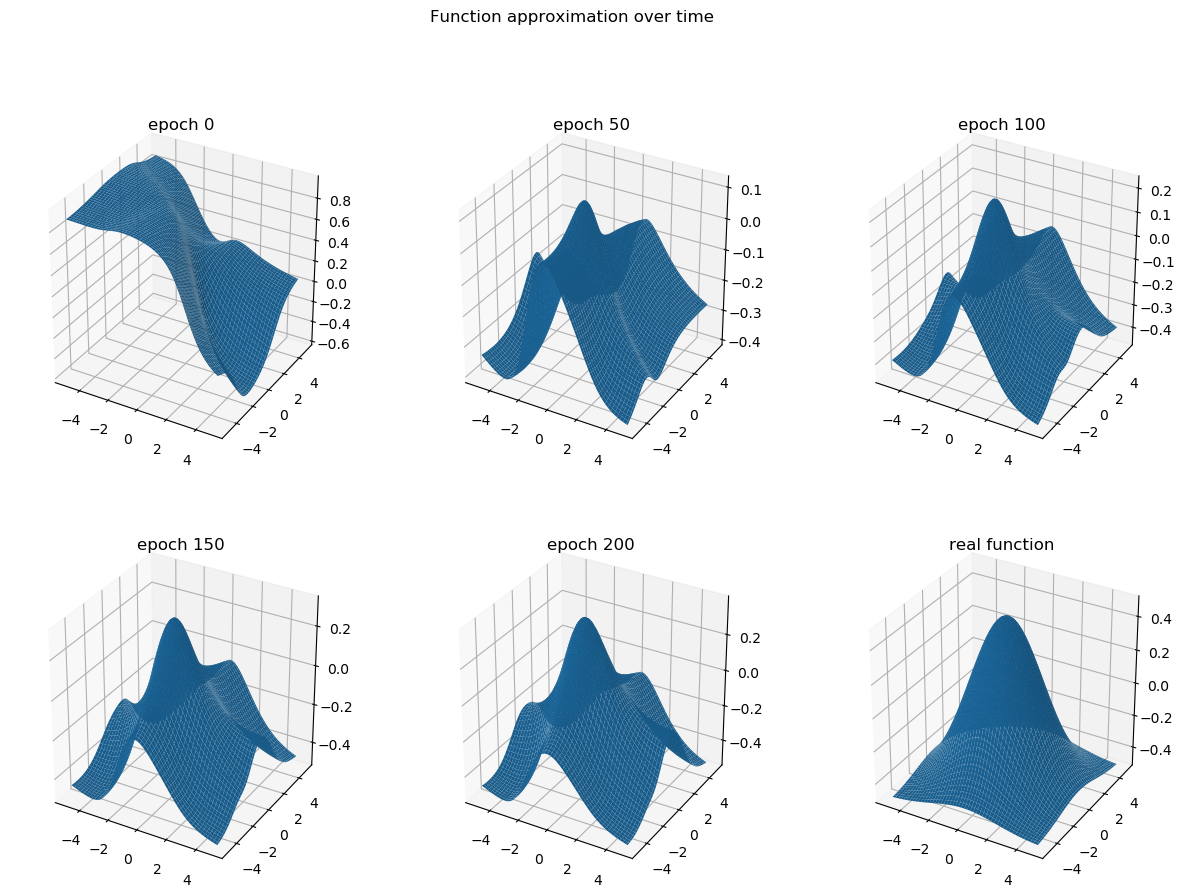

In [18]:


#same but the different graphs are shown in different subfigures part of the same figure
fig = plt.figure(figsize=(15, 10))
for i in range(len(result)):
    ax = fig.add_subplot(2,3,i+1,projection='3d')
    ax.plot_surface(X_graph,Y_graph,result[i].reshape(100,100))
    ax.set_title("epoch "+str(i*50))
ax = fig.add_subplot(2,3,6,projection='3d')
X,Y = np.meshgrid(x,y)
Z = function(X,Y)
ax.plot_surface(X,Y,Z)
ax.set_title("real function")
#add title to the figure
fig.suptitle("Function approximation over time")
plt.savefig("function_approximation_over_time.png")
plt.show()


2
3
4
5
6
7
8
9


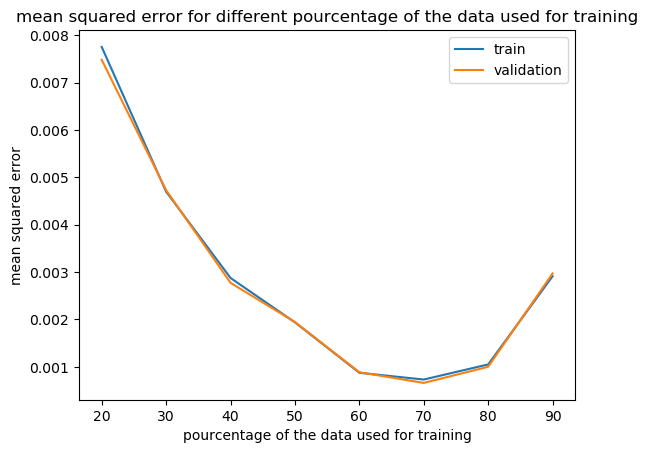

In [19]:


#initializing the weights and epochs
input_size = 2

output_layer = 1

#adding bias to the input
input_size += 1
epochs = 500
eta = 0.0001
mse = []
mse_val = []
node_layer1 = 20
   
w = np.random.randn(node_layer1,input_size)
v = np.random.randn(output_layer,node_layer1+1)
mse = []
mse_val = []
    #training the network
for j in range(2,10):
    #shuffle the data
    order = list(range(10000))
    random.shuffle(order)
    input = [input[:,i] for i in order]
    target = [target[:,i] for i in order]
    input = np.array(input).T
    target = np.array(target).T
    
    w = np.random.randn(node_layer1,input_size)
    v = np.random.randn(output_layer,node_layer1+1)
    print(j)
    nsam = j*1000
    input_1 = np.array(input[:,:nsam])
    validation = np.array(input[:,nsam:])
    target_1= np.array(target[:,:nsam])
    validation_target = np.array(target[:,nsam:])
    for i in range(epochs):
        w, v = backward(input_1,target_1,eta,w,v)
        #mean squared error
    mse.append(loss(input_1,target_1,w,v))
    mse_val.append(loss(validation,validation_target,w,v))

plt.plot([i for i in range(20,100,10)],mse,label="train")
plt.plot([i for i in range(20,100,10)],mse_val,label="validation")
#legend
plt.legend()
plt.xlabel("pourcentage of the data used for training")
plt.ylabel("mean squared error")
plt.title("mean squared error for different pourcentage of the data used for training")
plt.savefig("mean_squared_error_different_data.png")
plt.show()


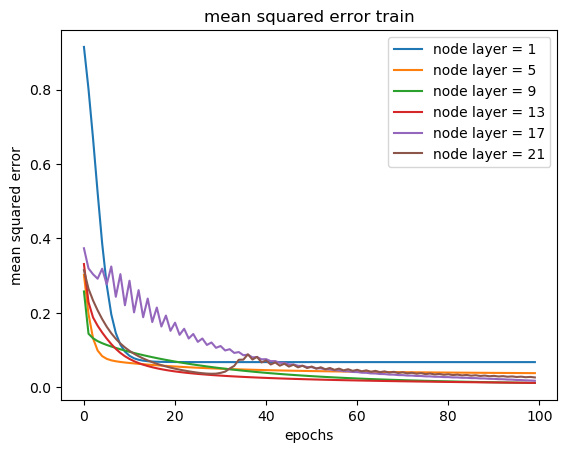

In [21]:
node_layer1_list = [i for i in range(1,25,4)]
for node_layer1 in node_layer1_list:
    w = np.random.randn(node_layer1,input_size)
    v = np.random.randn(output_layer,node_layer1+1)
    mse = []
    for i in range(100):
        w, v = backward(input,target,eta,w,v)
        #mean squared error
        mse.append(loss(input,target,w,v))
    
       
    plt.plot(mse,label="node layer = "+str(node_layer1))
plt.title("mean squared error train")
plt.xlabel("epochs")
plt.ylabel("mean squared error")
plt.legend()
plt.savefig("mean_squared_error_different_node_layer.png")
plt.show()